In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore') #import libraries

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #load mnist data

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
classes=['tshirt','shirt','pant','bag','shoe','trousers','jacket','frock','slippers','nightsuit']
np.unique(y_train)  #no of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing  Data Shape   : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape) #classes shape 

Training Data Shape   :  (60000, 28, 28)
Training Labels Shape :  (60000,)
Testing  Data Shape   :  (10000, 28, 28)
Testing Labels Shape  :  (10000,)


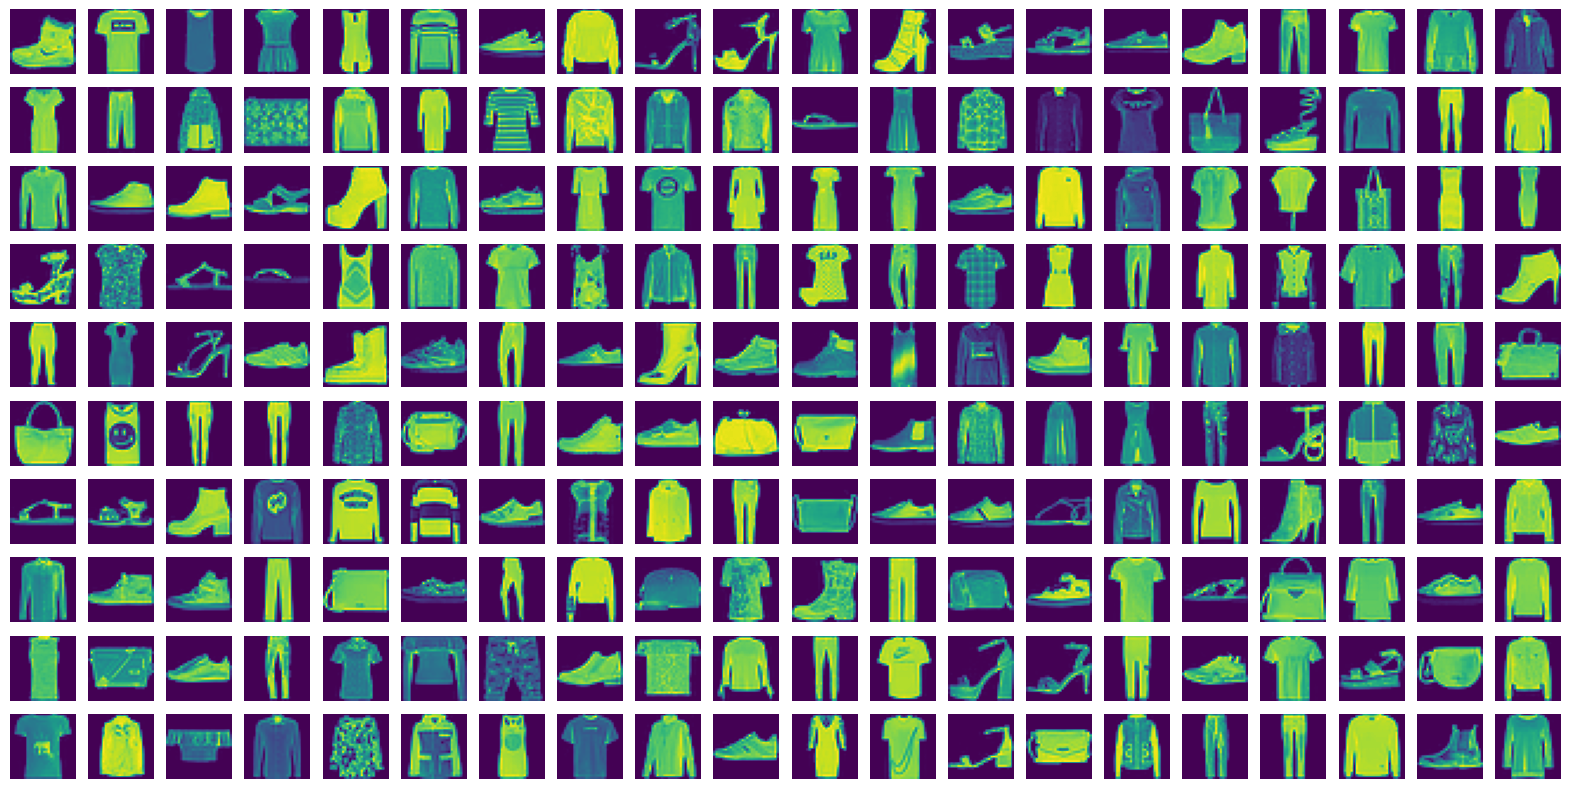

In [5]:
plt.figure(figsize = (20,10))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.axis('off')
  plt.imshow(x_train[i]) #images 

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1) #reshaping

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.2)#split dataset

In [8]:
# Encoding the labels
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val  = to_categorical(Y_val, num_classes = 10)

In [9]:
print('Training Data Shape     : ', X_train.shape)
print('Training Labels Shape   : ', Y_train.shape)
print()
print('Validation Data Shape   : ', X_val.shape)
print('Validation Labels Shape : ', Y_val.shape)
print()
print('Testing  Data Shape     : ', x_test.shape)
print('Testing Labels Shape    : ', y_test.shape) #shape of data

Training Data Shape     :  (48000, 28, 28, 1)
Training Labels Shape   :  (48000, 10)

Validation Data Shape   :  (12000, 28, 28, 1)
Validation Labels Shape :  (12000, 10)

Testing  Data Shape     :  (10000, 28, 28, 1)
Testing Labels Shape    :  (10000,)


In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.1,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, Y_train, batch_size = 400) #augmentation

In [11]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_val, Y_val)#fit validation dataset

In [12]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(300, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary() #model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         7

In [13]:
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) #compile

In [15]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 60,
    verbose = 1
) #fit the data

Epoch 1/60
120/120 [==============================] - 19s 161ms/step - loss: 0.6843 - accuracy: 0.7345 - val_loss: 0.8494 - val_accuracy: 0.6683
Epoch 2/60
120/120 [==============================] - 18s 149ms/step - loss: 0.5778 - accuracy: 0.7772 - val_loss: 0.4598 - val_accuracy: 0.8232
Epoch 3/60
120/120 [==============================] - 19s 161ms/step - loss: 0.4936 - accuracy: 0.8117 - val_loss: 0.4222 - val_accuracy: 0.8425
Epoch 4/60
120/120 [==============================] - 18s 146ms/step - loss: 0.4621 - accuracy: 0.8243 - val_loss: 0.4535 - val_accuracy: 0.8285
Epoch 5/60
120/120 [==============================] - 17s 144ms/step - loss: 0.4299 - accuracy: 0.8370 - val_loss: 0.3807 - val_accuracy: 0.8610
Epoch 6/60
120/120 [==============================] - 18s 149ms/step - loss: 0.3981 - accuracy: 0.8490 - val_loss: 0.3459 - val_accuracy: 0.8765
Epoch 7/60
120/120 [==============================] - 23s 195ms/step - loss: 0.3754 - accuracy: 0.8598 - val_loss: 0.3096 - val_ac

In [16]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss'] #accuracy

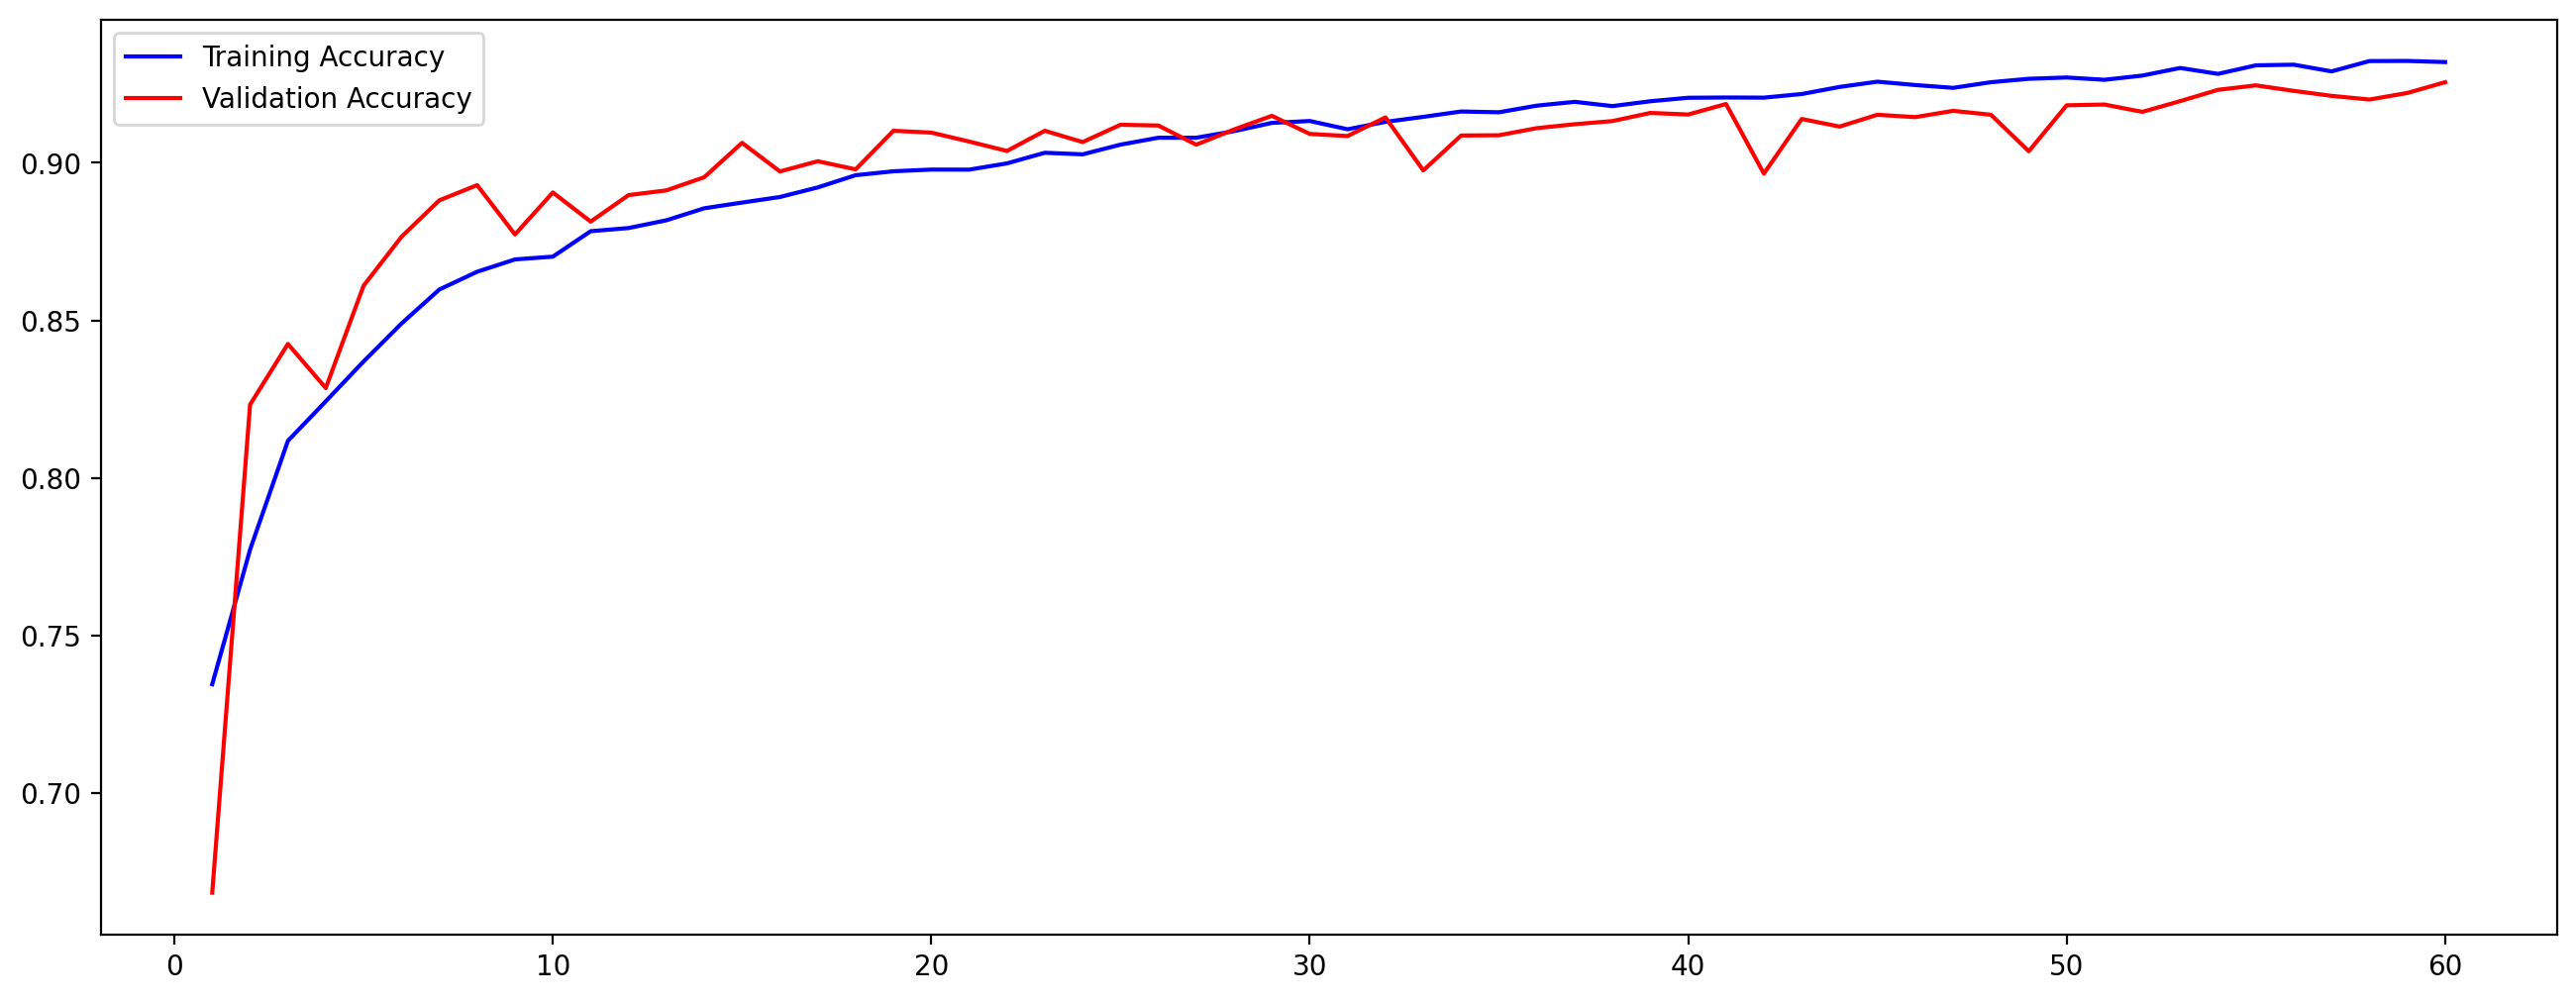

In [18]:
num_epochs = range(1,61)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend() #plot for accuracy

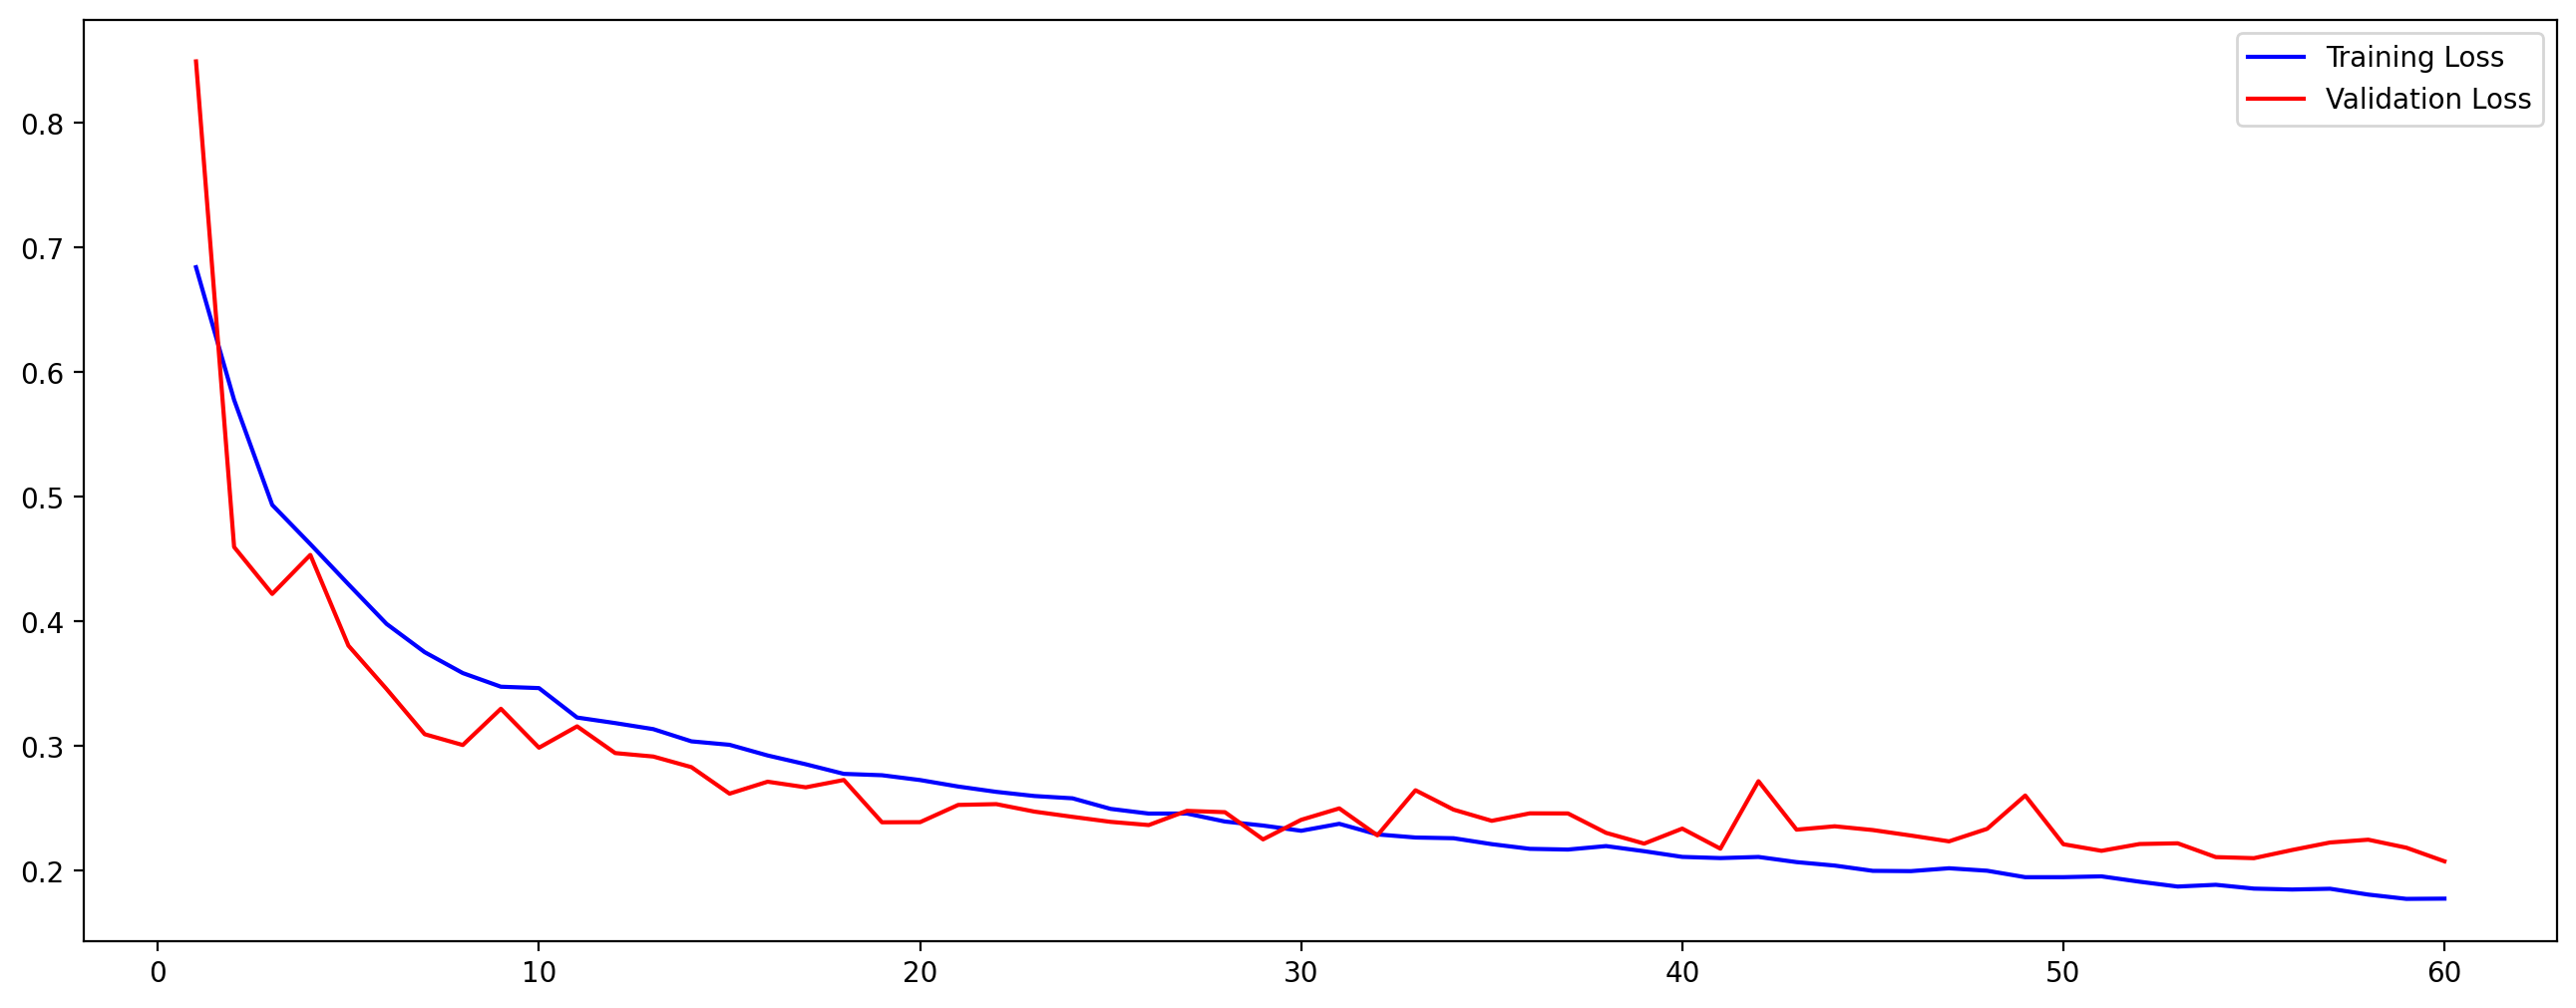

In [19]:
num_epochs = range(1,61)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend() #plot for loss

In [21]:
X_test = x_test/255
Y_pred = np.argmax(model.predict(X_test), axis = 1)
Y_pred.shape

313/313 [==============================] - 1s 3ms/step


(10000,)

In [23]:
from sklearn.metrics import accuracy_score
print('Testing Accuracy : ', accuracy_score(y_test, Y_pred)) #test accuracy

Testing Accuracy :  0.9214
